# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean(numbers):
  return sum(numbers)/len(numbers)
  
  
mean([3505, 2400, 3027, 2798, 3700, 3250, 2689])

def var(numbers):
  for i in numbers:
    return sum((i-mean(numbers))**2)/len(numbers)

var([3505, 2400, 3027, 2798, 3700, 3250, 2689])



In [36]:
results = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
# calculate mean
m = sum(results) / len(results)

# calculate variance using a list comprehension
var = sum((i - m) ** 2 for i in results) / len(results)

stdv = var**(1/2)

print(m)
print(var)
print(stdv)

3052.714285714286
183761.06122448976
428.67360686714756



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [53]:
import numpy as np
x = np.array([[3505, 2400, 3027, 2798, 3700, 3250, 2689],  [127, 80, 105, 92, 120, 115, 93]])
y= np.cov(x, bias=True)
print(y)

[[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [56]:
store = [127, 80, 105, 92, 120, 115, 93]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
r = y/(np.std(store) * np.std(sales))
print(r)

np.corrcoef(store, sales)


[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [87]:
import pandas as pd
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
df = pd.read_csv(url)
df.head()

df.describe()

np.cov(df["Unnamed: 0"], df["pclass"])

array([[143117.5,      nan],
       [     nan,      nan]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

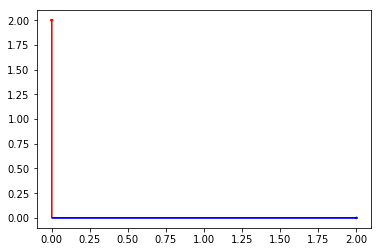

In [170]:
import matplotlib.pyplot as plt
a = np.array([[0, 2]])
b = np.array([[2, 0]])

plt.arrow(0, 0, 0, 2, head_width=.02, head_length=0.01, color = 'r')
plt.arrow(0, 0, 2, 0, head_width=.02, head_length=0.01, color = 'b')

ax = plt.plot(a, b)

#Orthogonal = perpendicular 



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [198]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
a, b, np.dot(a, b)

#since dot product != 0, not orthogonal 


(array([-5,  3,  7]), array([ 6, -8,  2]), -40)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, -15, 6, 20]])
c_dot = np.array([-2, -15, 6, 20])

In [230]:
np.linalg.norm(c)**2

665.0

In [236]:
np.dot(c_dot, c_dot)

665

In [234]:
np.matrix.transpose(c) * c

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{z} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [258]:
from fractions import Fraction
f = np.array([4, 12, 11, 9, 2])

np.linalg.norm(f), f / np.linalg.norm(f)



(19.131126469708992,
 array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]))

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

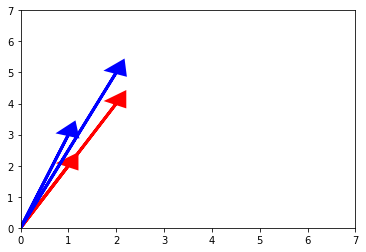

In [281]:
#red are linearly dependent to each other; blue are linearly independent to each other 

plt.xlim(0, 7)
plt.ylim(-0, 7)

a = np.array([1, 2])
b = np.array([2, 4])
c = np.array([1, 3])
d = np.array([2, 5])

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, c[0], c[1], linewidth=3, head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, d[0], d[1], linewidth=3, head_width=.4, head_length=0.4, color ='blue')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#since the two vectors above are linearly dependent their span corresponds to the line in two-dimensional space where they lie
#the span is the area we can fill with a linear combination of the two vectors above 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#the span of {l, m, n} is the space in two-dimensional that the vectors above lie in
#the vectors are linearly independent and thus every unique vector in the space may be created from {l, m, n}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



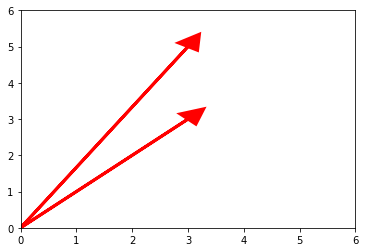

In [287]:
plt.xlim(0,6)
plt.ylim(0,6)

a = np.array([3, 3])
b = np.array([3, 5])

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.4, head_length=0.4, color ='red')

## 6.2 What does it mean to form a basis?

To form a basis means that a set of linearly independent vectors span the space, meaning that a linear combination of the vectors allows us to reproduce every combination of two-dimensional space in our example above  

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [306]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
P
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

the rank tells us the dimensionality of the space the vectors' columns span, in our example above our vectors lie in 3-D space and since there is no linear combination of any one of the columns/rows that produce any other columns/rows, the vectors in 3-D space span the 3-D space

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

array([-1., 18.])

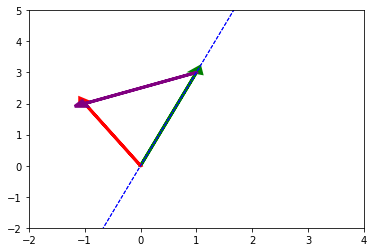

In [354]:
plt.xlim(-2, 4)
plt.ylim(-2, 5)

v = np.array([1, 3])
w = np.array([-1, 2])

axes = plt.gca()

x_vals = np.array(axes.get_xlim())
y_vals = x_vals*3

x_minus_proj = w - v

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.2, head_length=0.2, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.2, head_length=0.2, color ='red')
plt.arrow(v[0],v[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.2, head_length=0.2, color ='purple')
#plt.arrow(v[0],v[1], proj[0], proj[1], linewidth=3, head_width=.2, head_length=0.2, color ='black')


proj = (w*v/v*v)*v 
proj



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

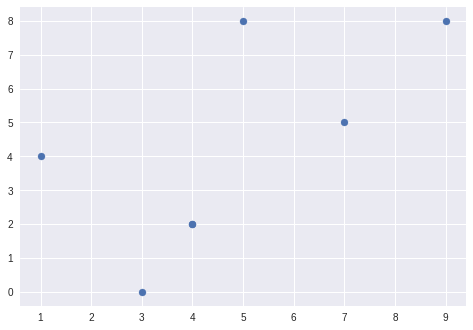

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()